In [1]:
import multirex as mrex
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import pandas as pd
from tqdm import tqdm

Run this to get the data required to generate the data spectrum.

We are downloading the opacities from the [ExoMol](http://www.exomol.com/) database and [Exo-Transmit](https://github.com/elizakempton/Exo_Transmit) and stellar grid from [PHOENIX](https://ui.adsabs.harvard.edu/abs/2013A%26A...553A...6H/abstract) database.


In [2]:
mrex.Util.get_gases()
mrex.Util.get_stellar_phoenix()
mrex.Util.list_gases()

The path where the opacity database will be downloaded is :  current directory


Downloading...
From (original): https://drive.google.com/uc?id=1z7R0hD1IBuYo-nnl7dpE_Ls2337a0uv6
From (redirected): https://drive.google.com/uc?id=1z7R0hD1IBuYo-nnl7dpE_Ls2337a0uv6&confirm=t&uuid=acefe36e-7449-4793-a5b2-a9da8c9a0791
To: c:\Astro\My_repos\MultiREx-public\examples\research\opacidades-todas.zip
100%|██████████| 2.12G/2.12G [02:41<00:00, 13.1MB/s]


The path where the Phoenix stellar spectra will be downloaded is :  current directory


Downloading...
From (original): https://drive.google.com/uc?id=1fgKjDu9H26y5WMwRZaMCuSpHhx8zc0pR
From (redirected): https://drive.google.com/uc?id=1fgKjDu9H26y5WMwRZaMCuSpHhx8zc0pR&confirm=t&uuid=0cd6ae19-bb53-43d2-9307-9791577cc45f
To: c:\Astro\My_repos\MultiREx-public\examples\research\Phoenix.zip
100%|██████████| 2.46G/2.46G [03:04<00:00, 13.3MB/s]


Available gases in the database:
['O2', 'SO2', 'NO2', 'CO', 'CH3Cl', 'H2O', 'C2H6', 'N2', 'O3', 'NH3', 'CO2', 'HCN', 'DMS', 'CH4']


## TRAPPIST-1e

In [2]:
trappist1= mrex.Star(temperature=2566,radius=0.1192, mass=0.0898,phoenix_path="")
trappist1e= mrex.Planet(radius=0.920,mass=0.692)
# abiotic atmosphere
atm00= mrex.Atmosphere(temperature=287,base_pressure=1e5,
                           top_pressure=1e-3,composition={"CO2":-2},fill_gas="N2")

trappist1e.set_atmosphere(atm00)

sistema=mrex.System(planet=trappist1e,star=trappist1,
                    sma=0.02925)
sistema.make_tm()

#load txt waves.txt, this file contains the wavenumber grid simulated by PandExo
waves=np.loadtxt("waves.txt")
n_points = len(waves)
indices = np.linspace(0, len(waves) - 1, n_points, endpoint=True)
indices = np.round(indices).astype(int)  # Redondear los índices y convertir a entero

# Seleccionar los elementos de la lista usando los índices
puntos_seleccionados = waves[indices]
waves=puntos_seleccionados
wn_grid=np.sort((10000/waves))

The directory to Phoenix already exists in the specified path:  current directory


### CO2

Exploring universes:   0%|          | 0/1 [00:00<?, ?it/s]c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes:   0%|          | 0/1 [00:00<?, ?it/s]c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes:   0%|          | 0/1 [00:00<?, ?it/s]c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, a

Text(0.5, 1.0, 'CO2 data')

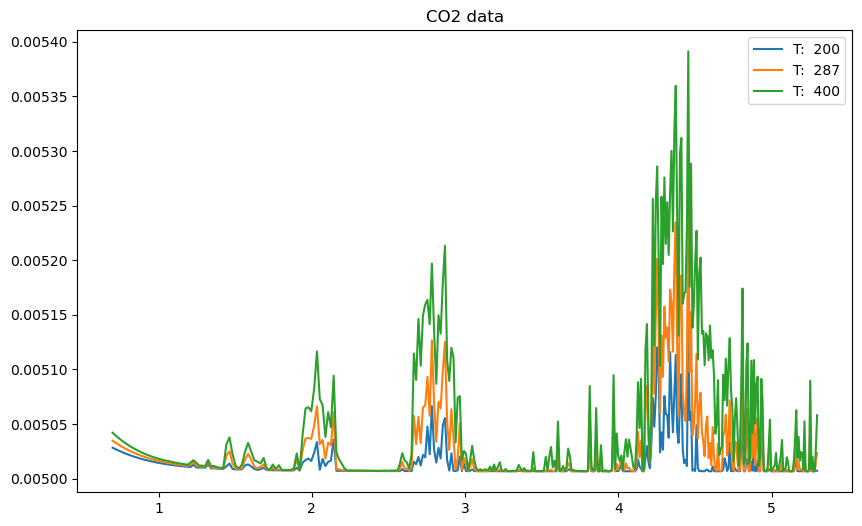

In [7]:
temps = [200,287,400]
CO2_T_df=[]

for T in temps:
    
    sistema.planet.atmosphere.set_temperature(T)
    

    CO2_data=sistema.explore_multiverse(wn_grid,
                               snr= "nan",
                               n_universes=1,
                               labels=["CH4","O3","H2O"],
                               header=True,
                               n_observations=1,
                               spectra=True,
                               observations=False)
    CO2_T_df.append(CO2_data)
    

CO2_data=pd.concat(CO2_T_df)

CO2_data["atm CH4"] = 0
CO2_data["atm H2O"] = 0
CO2_data["atm O3"] = 0


## move last two columns to the first two positions
cols = CO2_data.columns.tolist()
cols = cols[-3:] + cols[:-3]
CO2_data = CO2_data[cols]

CO2_data["label"]= CO2_data["label"].apply(lambda x: [0,0,0])
CO2_data.describe()

CO2_data.params=CO2_data.iloc[:,:-n_points]
CO2_data.data=CO2_data.iloc[:,-n_points:]

plt.figure(figsize=(10,6))
for i in range(3):
    plt.plot(1e4/wn_grid,CO2_data.data.iloc[i],label=f"T:  {temps[i]}")
plt.legend()
plt.title("CO2 data")



### CH4

  0%|          | 0/10 [00:00<?, ?it/s]

CH4 already exists in the composition. Its old value was -1. It will be updated to -10.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

CH4 already exists in the composition. Its old value was -10. It will be updated to -9.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

CH4 already exists in the composition. Its old value was -9. It will be updated to -8.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

CH4 already exists in the composition. Its old value was -8. It will be updated to -7.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

CH4 already exists in the composition. Its old value was -7. It will be updated to -6.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

CH4 already exists in the composition. Its old value was -6. It will be updated to -5.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

CH4 already exists in the composition. Its old value was -5. It will be updated to -4.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

CH4 already exists in the composition. Its old value was -4. It will be updated to -3.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

CH4 already exists in the composition. Its old value was -3. It will be updated to -2.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

CH4 already exists in the composition. Its old value was -2. It will be updated to -1.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

Text(0.5, 1.0, 'CH4 data')

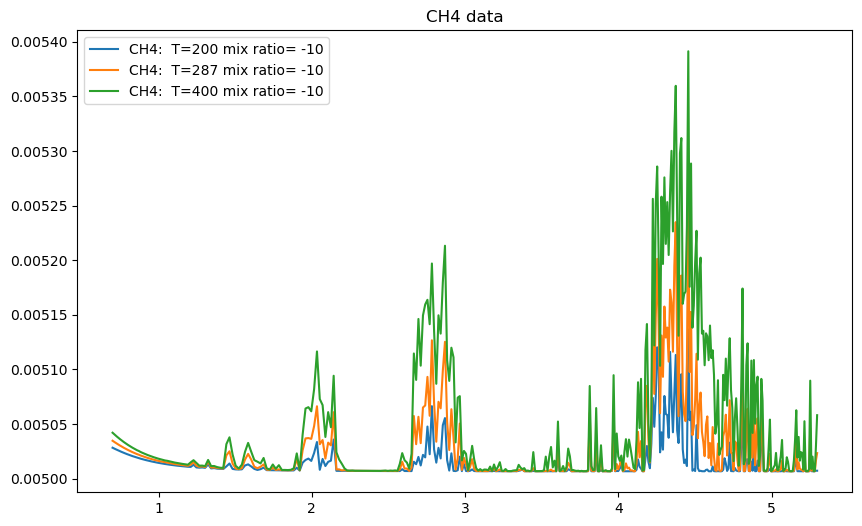

In [11]:
CH4_data=[]

for i in tqdm(range(-10,0)):
    sistema.planet.atmosphere.add_gas("CH4",i)
    CH4_T_df=[]
    for T in temps:
        sistema.planet.atmosphere.set_temperature(T)
        CH4_T_df.append(sistema.explore_multiverse(wn_grid,
                               snr="nan",
                               n_universes=1,
                               labels=["CH4","O3","H2O"],
                               header=True,
                               n_observations=1,
                               spectra=True,
                               observations=False))
    CH4_T_df=pd.concat(CH4_T_df)
    CH4_data.append(CH4_T_df)
        
CH4_data=pd.concat(CH4_data,
                   ignore_index=True)
CH4_data["label"] = CH4_data["label"].apply(lambda x: [1,0,0])
CH4_data["atm O3"] = 0
CH4_data["atm H2O"] = 0

## move last two columns to the first two positions
cols = CH4_data.columns.tolist()
cols = cols[-2:] + cols[:-2]
CH4_data = CH4_data[cols]

CH4_data.data=CH4_data.iloc[:,-n_points:]
CH4_data.params=CH4_data.iloc[:,:-n_points]

plt.figure(figsize=(10,6))
for i in range(3):
    plt.plot(1e4/wn_grid,CH4_data.data.iloc[i],label=f'''CH4:  T={CH4_data["atm temperature"].iloc[i]} mix ratio= {CH4_data["atm CH4"].iloc[i]}''')
plt.legend()
plt.title("CH4 data")


### O3

CH4 does not exist in the composition. No action will be taken.


  0%|          | 0/10 [00:00<?, ?it/s]

O3 already exists in the composition. Its old value was -10. It will be updated to -10.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

O3 already exists in the composition. Its old value was -10. It will be updated to -9.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

O3 already exists in the composition. Its old value was -9. It will be updated to -8.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

O3 already exists in the composition. Its old value was -8. It will be updated to -7.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

O3 already exists in the composition. Its old value was -7. It will be updated to -6.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

O3 already exists in the composition. Its old value was -6. It will be updated to -5.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

O3 already exists in the composition. Its old value was -5. It will be updated to -4.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

O3 already exists in the composition. Its old value was -4. It will be updated to -3.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

O3 already exists in the composition. Its old value was -3. It will be updated to -2.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

O3 already exists in the composition. Its old value was -2. It will be updated to -1.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

Text(0.5, 1.0, 'O3 data')

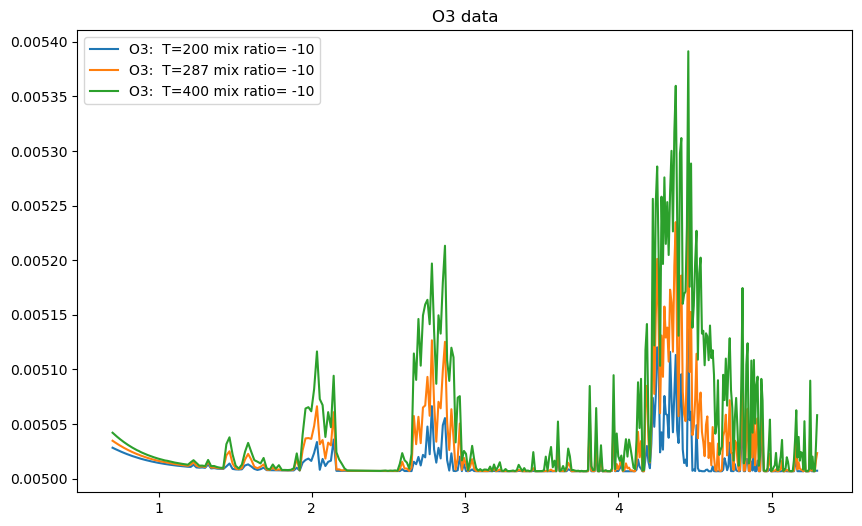

In [13]:
sistema.planet.atmosphere.remove_gas("CH4")

O3_data=[]

for i in tqdm(range(-10,0)):
    sistema.planet.atmosphere.add_gas("O3",i)
    
    O3_T = []
    
    for T in temps:
        sistema.planet.atmosphere.set_temperature(T)
        O3_T.append(sistema.explore_multiverse(wn_grid,
                               snr="nan",
                               n_universes=1,
                               labels=["CH4","O3","H2O"],
                               header=True,
                               n_observations=1,
                               spectra=True,
                               observations=False))
    O3_T=pd.concat(O3_T)
    O3_data.append(O3_T)
    
O3_data=pd.concat(O3_data,
                  ignore_index=True)

O3_data["label"] = O3_data["label"].apply(lambda x: [0,1,0])

O3_data["atm CH4"] = 0
O3_data["atm H2O"] = 0

## move last two columns to the first two positions
cols = O3_data.columns.tolist()
cols = cols[-2:] + cols[:-2]
O3_data=O3_data[cols]

O3_data.data=O3_data.iloc[:,-n_points:]
O3_data.params=O3_data.iloc[:,:-n_points]

plt.figure(figsize=(10,6))
for i in range(3):
    plt.plot(1e4/wn_grid,O3_data.data.iloc[i],label=f'''O3:  T={O3_data["atm temperature"].iloc[i]} mix ratio= {O3_data["atm O3"].iloc[i]}''')
plt.legend()
plt.title("O3 data")



### H2O


O3 does not exist in the composition. No action will be taken.


  0%|          | 0/10 [00:00<?, ?it/s]

H2O already exists in the composition. Its old value was -10. It will be updated to -10.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

H2O already exists in the composition. Its old value was -10. It will be updated to -9.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

H2O already exists in the composition. Its old value was -9. It will be updated to -8.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

H2O already exists in the composition. Its old value was -8. It will be updated to -7.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

H2O already exists in the composition. Its old value was -7. It will be updated to -6.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

H2O already exists in the composition. Its old value was -6. It will be updated to -5.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

H2O already exists in the composition. Its old value was -5. It will be updated to -4.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

H2O already exists in the composition. Its old value was -4. It will be updated to -3.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

H2O already exists in the composition. Its old value was -3. It will be updated to -2.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

H2O already exists in the composition. Its old value was -2. It will be updated to -1.


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]
Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]
c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extr

Text(0.5, 1.0, 'H2O data')

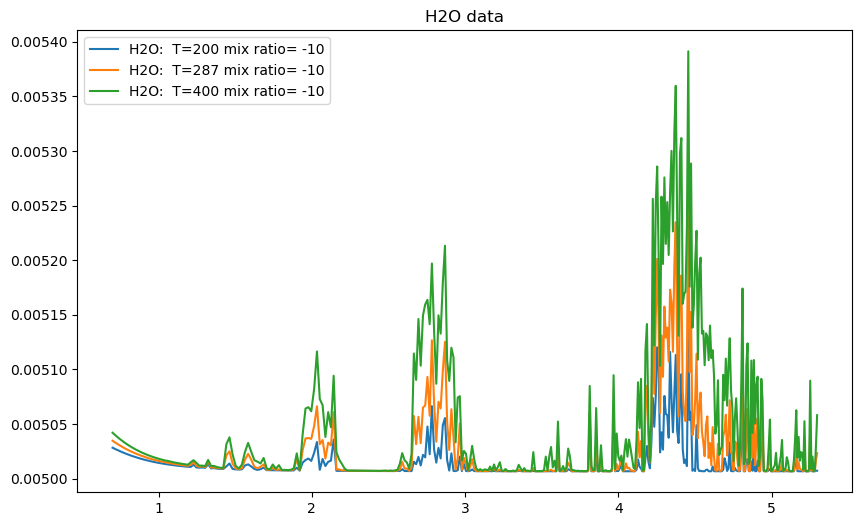

In [16]:
sistema.planet.atmosphere.remove_gas("O3")

H2O_data=[]

for i in tqdm(range(-10,0)):
    sistema.planet.atmosphere.add_gas("H2O",i)
    
    H2O_T = []
    
    for T in temps:
        sistema.planet.atmosphere.set_temperature(T)
        H2O_T.append(sistema.explore_multiverse(wn_grid,
                               snr="nan",
                               n_universes=1,
                               labels=["CH4","O3","H2O"],
                               header=True,
                               n_observations=1,
                               spectra=True,
                               observations=False))
    
    H2O_T=pd.concat(H2O_T)
    H2O_data.append(H2O_T)
    
H2O_data=pd.concat(H2O_data,
                   ignore_index=True)

H2O_data["label"] = H2O_data["label"].apply(lambda x: [0,0,1])

H2O_data["atm CH4"] = 0
H2O_data["atm O3"] = 0

## move last two columns to the first two positions
cols = H2O_data.columns.tolist()
cols = cols[-2:] + cols[:-2]
H2O_data=H2O_data[cols]

H2O_data.data=H2O_data.iloc[:,-n_points:]
H2O_data.params=H2O_data.iloc[:,:-n_points]

plt.figure(figsize=(10,6))
for i in range(3):
    plt.plot(1e4/wn_grid,H2O_data.data.iloc[i],label=f'''H2O:  T={H2O_data["atm temperature"].iloc[i]} mix ratio= {H2O_data["atm H2O"].iloc[i]}''')
plt.legend()
plt.title("H2O data")



### CH4 + O3

H2O does not exist in the composition. No action will be taken.


  0%|          | 0/10 [00:00<?, ?it/s]

CH4 already exists in the composition. Its old value was -1. It will be updated to -10.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -9.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -8.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -7.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -6.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -5.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -4.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -3.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -2.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -1.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

Text(0.5, 1.0, 'CH4_O3 data\n\n          CH4: -10\n          O3: -10')

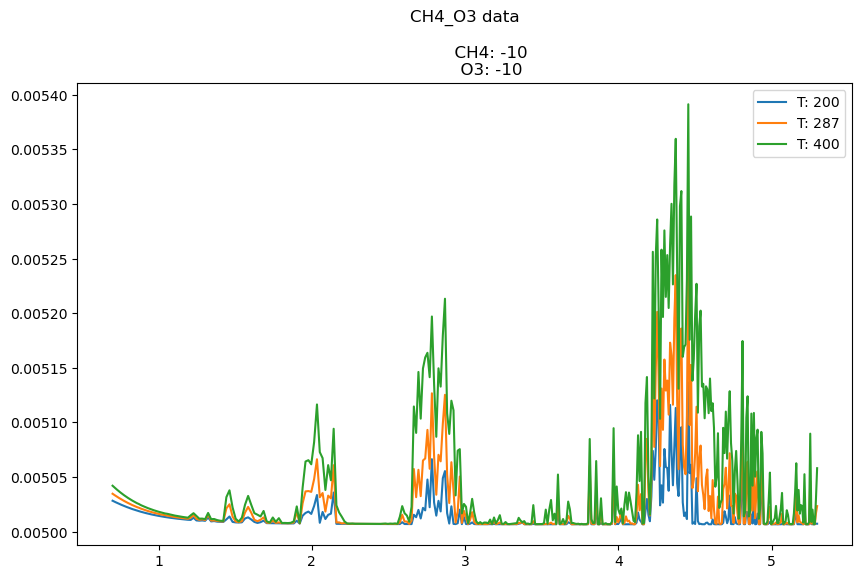

In [19]:
sistema.planet.atmosphere.remove_gas("H2O")

CH4_O3_data = []

for i in tqdm(range(-10,0)):    
    for j in tqdm(range(-10,0)):
        sistema.planet.atmosphere.add_gas("CH4",i)
        sistema.planet.atmosphere.add_gas("O3",j)
        
        CH4_O3_T = []
        for T in temps:
            sistema.planet.atmosphere.set_temperature(T)
            CH4_O3_T.append(sistema.explore_multiverse(wn_grid,
                               snr="nan",
                               n_universes=1,
                               labels=["CH4","O3","H2O"],
                               header=True,
                               n_observations=1,
                               spectra=True,
                               observations=False))
        CH4_O3_T=pd.concat(CH4_O3_T)
        CH4_O3_data.append(CH4_O3_T)
        
CH4_O3_data = pd.concat(CH4_O3_data,
                        ignore_index=True)

CH4_O3_data["label"] = CH4_O3_data["label"].apply(lambda x: [1,1,0])
CH4_O3_data["atm H2O"] = 0
cols = CH4_O3_data.columns.tolist()
cols = cols[-1:] + cols[:-1]
CH4_O3_data = CH4_O3_data[cols]

CH4_O3_data.data = CH4_O3_data.iloc[:,-n_points:]
CH4_O3_data.params = CH4_O3_data.iloc[:,:-n_points]

plt.figure(figsize=(10,6))
for i in range(3):
    plt.plot(1e4/wn_grid,CH4_O3_data.data.iloc[i],
             label=f'''T: {CH4_O3_data["atm temperature"].iloc[i]}''')
plt.legend()
plt.title(f'''CH4_O3 data\n
          CH4: {CH4_O3_data["atm CH4"].iloc[0]}
          O3: {CH4_O3_data["atm O3"].iloc[0]}''')


### CH4 + H2O

O3 does not exist in the composition. No action will be taken.


  0%|          | 0/10 [00:00<?, ?it/s]

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -10. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -10. It will be updated to -9.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -9. It will be updated to -8.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -8. It will be updated to -7.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -7. It will be updated to -6.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -6. It will be updated to -5.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -5. It will be updated to -4.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -4. It will be updated to -3.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -3. It will be updated to -2.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -2. It will be updated to -1.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

Text(0.5, 1.0, 'CH4_H2O data\n\n          CH4: -10\n          H2O: -10')

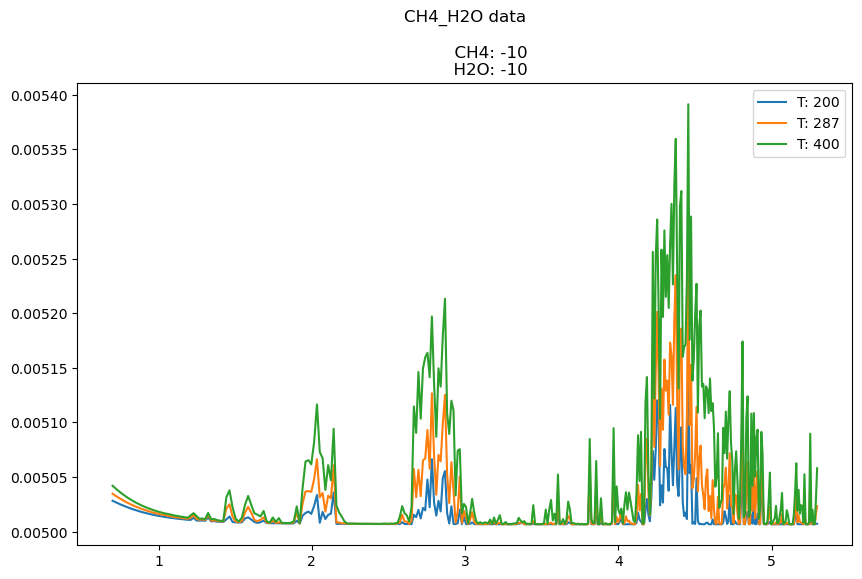

In [21]:
sistema.planet.atmosphere.remove_gas("O3")

CH4_H2O_data=[]

for i in tqdm(range(-10,0)):    
    for j in tqdm(range(-10,0)):
        sistema.planet.atmosphere.add_gas("CH4",i)
        sistema.planet.atmosphere.add_gas("H2O",j)
        
        CH4_H2O_T = []
        
        for T in temps:
            sistema.planet.atmosphere.set_temperature(T)
            CH4_H2O_T.append(sistema.explore_multiverse(wn_grid,
                               snr="nan",
                               n_universes=1,
                               labels=["CH4","O3","H2O"],
                               header=True,
                               n_observations=1,
                               spectra=True,
                               observations=False))
            
        CH4_H2O_T=pd.concat(CH4_H2O_T)
        CH4_H2O_data.append(CH4_H2O_T)
### concatenate all

CH4_H2O_data=pd.concat(CH4_H2O_data,
                        ignore_index=True)

CH4_H2O_data["label"]= CH4_H2O_data["label"].apply(lambda x: [1,0,1])
CH4_H2O_data["atm O3"]= 0
cols= CH4_H2O_data.columns.tolist()
cols= cols[-1:]+cols[:-1]
CH4_H2O_data=CH4_H2O_data[cols]


CH4_H2O_data.data=CH4_H2O_data.iloc[:,-n_points:]
CH4_H2O_data.params=CH4_H2O_data.iloc[:,:-n_points]

plt.figure(figsize=(10,6))
for i in range(3):
    plt.plot(1e4/wn_grid,CH4_H2O_data.data.iloc[i],
             label=f'''T: {CH4_H2O_data["atm temperature"].iloc[i]}''')
plt.legend()
plt.title(f'''CH4_H2O data\n
          CH4: {CH4_H2O_data["atm CH4"].iloc[0]}
          H2O: {CH4_H2O_data["atm H2O"].iloc[0]}''')


### O3 + H2O

CH4 does not exist in the composition. No action will be taken.


  0%|          | 0/10 [00:00<?, ?it/s]

O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -10. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -10. It will be updated to -9.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -9. It will be updated to -8.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -8. It will be updated to -7.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -7. It will be updated to -6.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -6. It will be updated to -5.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -5. It will be updated to -4.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -4. It will be updated to -3.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -3. It will be updated to -2.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -2. It will be updated to -1.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.



c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]

Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

Text(0.5, 1.0, 'O3_H2O data\n\n          O3: -10\n          H2O: -10')

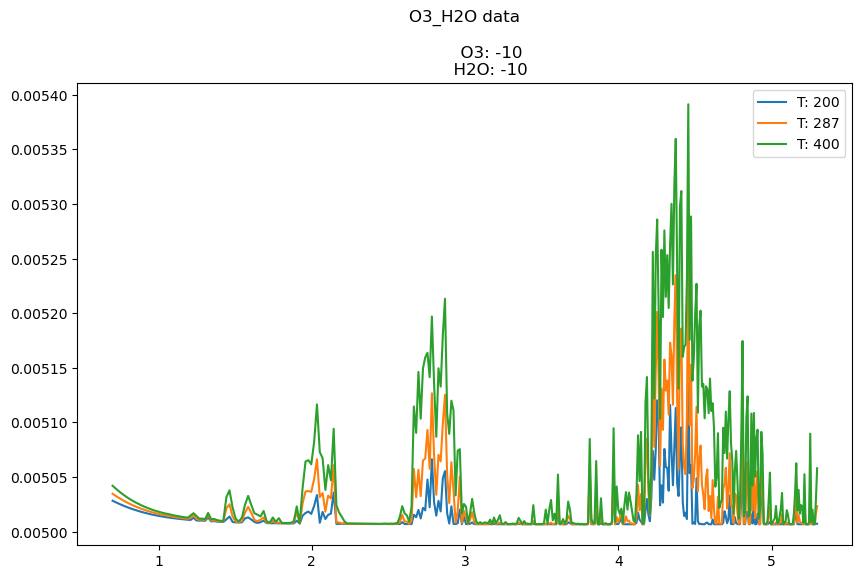

In [23]:
sistema.planet.atmosphere.remove_gas("CH4")

O3_H2O_data = []

for i in tqdm(range(-10,0)):
    for j in tqdm(range(-10,0)):
        sistema.planet.atmosphere.add_gas("O3",i)
        sistema.planet.atmosphere.add_gas("H2O",j)
        
        O3_H2O_T = []
        
        for T in temps:
            sistema.planet.atmosphere.set_temperature(T)
            O3_H2O_T.append(sistema.explore_multiverse(wn_grid,
                               snr="nan",
                               n_universes=1,
                               labels=["CH4","O3","H2O"],
                               header=True,
                               n_observations=1,
                               spectra=True,
                               observations=False))
            
        O3_H2O_T=pd.concat(O3_H2O_T)
        O3_H2O_data.append(O3_H2O_T)
    
O3_H2O_data = pd.concat(O3_H2O_data,
                        ignore_index=True)

O3_H2O_data["label"] = O3_H2O_data["label"].apply(lambda x: [0,1,1])
O3_H2O_data["atm CH4"] = 0
cols = O3_H2O_data.columns.tolist()
cols = cols[-1:] + cols[:-1]
O3_H2O_data = O3_H2O_data[cols]

O3_H2O_data.data = O3_H2O_data.iloc[:,-n_points:]
O3_H2O_data.params = O3_H2O_data.iloc[:,:-n_points]

plt.figure(figsize=(10,6))
for i in range(3):
    plt.plot(1e4/wn_grid,O3_H2O_data.data.iloc[i],
             label=f'''T: {O3_H2O_data["atm temperature"].iloc[i]}''')
plt.legend()
plt.title(f'''O3_H2O data\n
          O3: {O3_H2O_data["atm O3"].iloc[0]}
          H2O: {O3_H2O_data["atm H2O"].iloc[0]}''')


### CH4 + O3 + H2O

  0%|          | 0/10 [00:00<?, ?it/s]


O3 already exists in the composition. Its old value was -1. It will be updated to -10.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -10.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -10. It will be updated to -9.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -9.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -9. It will be updated to -8.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -8.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -8. It will be updated to -7.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -7.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -7. It will be updated to -6.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -6.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -6. It will be updated to -5.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -5.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -5. It will be updated to -4.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -4.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -4. It will be updated to -3.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -3.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -3. It will be updated to -2.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -2.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -2. It will be updated to -1.
O3 already exists in the composition. Its old value was -1. It will be updated to -10.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -10. It will be updated to -10.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -10. It will be updated to -9.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -9. It will be updated to -9.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -9. It will be updated to -8.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -8. It will be updated to -8.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -8. It will be updated to -7.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -7. It will be updated to -7.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -7. It will be updated to -6.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -6. It will be updated to -6.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -6. It will be updated to -5.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -5. It will be updated to -5.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -5. It will be updated to -4.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -4. It will be updated to -4.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -4. It will be updated to -3.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -3. It will be updated to -3.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -3. It will be updated to -2.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -2. It will be updated to -2.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -2. It will be updated to -1.
H2O already exists in the composition. Its old value was -1. It will be updated to -10.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -10. It will be updated to -9.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -9. It will be updated to -8.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -8. It will be updated to -7.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -7. It will be updated to -6.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -6. It will be updated to -5.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -5. It will be updated to -4.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -4. It will be updated to -3.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -3. It will be updated to -2.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

CH4 already exists in the composition. Its old value was -1. It will be updated to -1.
O3 already exists in the composition. Its old value was -1. It will be updated to -1.
H2O already exists in the composition. Its old value was -2. It will be updated to -1.




c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._files[int(idx)]


Exploring universes: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


c:\Users\santi\anaconda3\Lib\site-packages\taurex\data\stellar\phoenix.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensur

Text(0.5, 1.0, 'CH4_O3_H2O data\n\n          CH4: -10\n          O3: -10\n          H2O: -10')

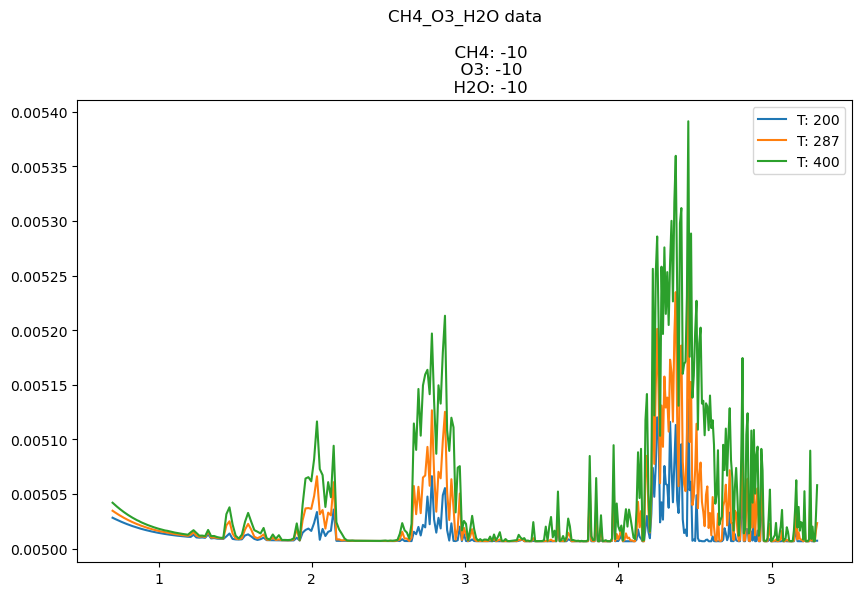

In [24]:
CH4_O3_H2O_data = []

for i in tqdm(range(-10,0)):    
    for j in tqdm(range(-10,0)):
        for k in tqdm(range(-10,0)):
            sistema.planet.atmosphere.add_gas("CH4",i)
            sistema.planet.atmosphere.add_gas("O3",j)
            sistema.planet.atmosphere.add_gas("H2O",k)
            
            CH4_O3_H2O_T = []
            
            for T in temps:
                sistema.planet.atmosphere.set_temperature(T)
                CH4_O3_H2O_T.append(sistema.explore_multiverse(wn_grid,
                               snr="nan",
                               n_universes=1,
                               labels=["CH4","O3","H2O"],
                               header=True,
                               n_observations=1,
                               spectra=True,
                               observations=False))
                
            CH4_O3_H2O_T=pd.concat(CH4_O3_H2O_T)
            CH4_O3_H2O_data.append(CH4_O3_H2O_T)
            
CH4_O3_H2O_data = pd.concat(CH4_O3_H2O_data,
                            ignore_index=True)

CH4_O3_H2O_data["label"] = CH4_O3_H2O_data["label"].apply(lambda x: [1,1,1])

CH4_O3_H2O_data.data = CH4_O3_H2O_data.iloc[:,-n_points:]
CH4_O3_H2O_data.params = CH4_O3_H2O_data.iloc[:,:-n_points]

plt.figure(figsize=(10,6))
for i in range(3):
    plt.plot(1e4/wn_grid,CH4_O3_H2O_data.data.iloc[i],
             label=f'''T: {CH4_O3_H2O_data["atm temperature"].iloc[i]}''')
plt.legend()
plt.title(f'''CH4_O3_H2O data\n
          CH4: {CH4_O3_H2O_data["atm CH4"].iloc[0]}
          O3: {CH4_O3_H2O_data["atm O3"].iloc[0]}
          H2O: {CH4_O3_H2O_data["atm H2O"].iloc[0]}''')

## Save the data

In [25]:
## save as csv eacha data
CO2_data.to_csv("spec_data/CO2_data.csv")
CH4_data.to_csv("spec_data/CH4_data.csv")
O3_data.to_csv("spec_data/O3_data.csv")
H2O_data.to_csv("spec_data/H2O_data.csv")
CH4_O3_data.to_csv("spec_data/CH4_O3_data.csv")
CH4_H2O_data.to_csv("spec_data/CH4_H2O_data.csv")
O3_H2O_data.to_csv("spec_data/O3_H2O_data.csv")
CH4_O3_H2O_data.to_csv("spec_data/CH4_O3_H2O_data.csv")

# Example plot

The directory to Phoenix already exists in the specified path:  current directory


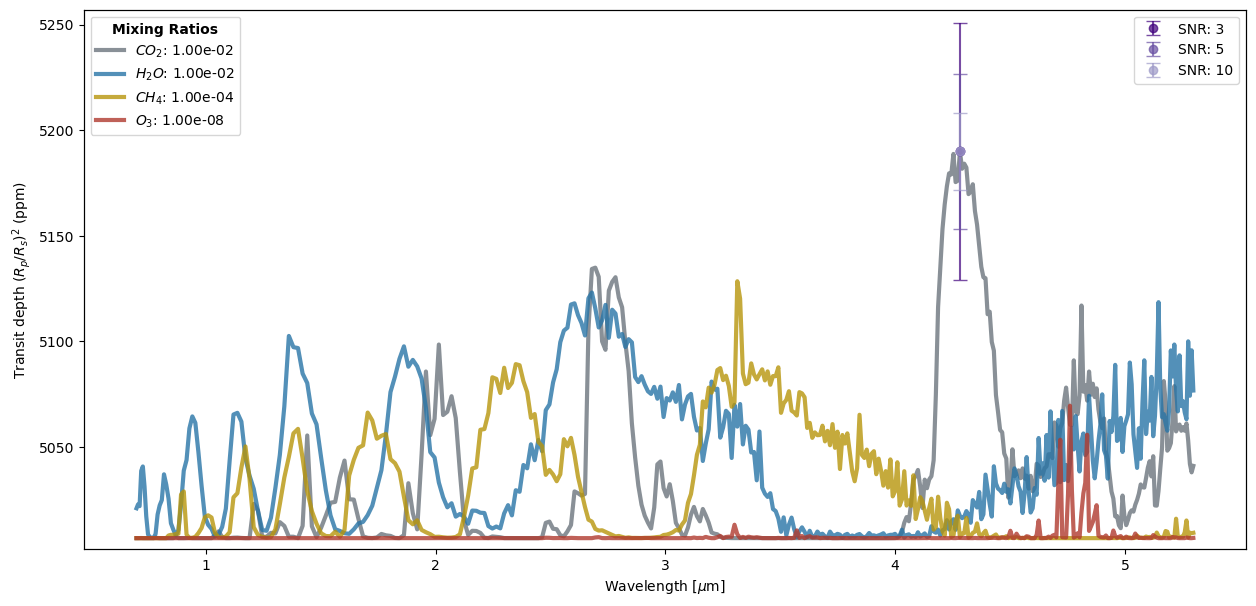

In [3]:
import matplotlib.ticker as ticker

trappist1= mrex.Star(temperature=2566,radius=0.1192,
                     mass=0.0898,phoenix_path="")
trappist1e= mrex.Planet(radius=0.920,mass=0.692)
# Proterozoic Earth atmosphere, surface values
atm00= mrex.Atmosphere(temperature=283,
                       base_pressure=1e5,
                       top_pressure=1e-3,
                       composition={
                               "CO2":-2,
                               "O3":-8,
                               "CH4":-4,
                               "H2O":-2,
                               },
                       fill_gas="N2")

trappist1e.set_atmosphere(atm00)

sistema=mrex.System(planet=trappist1e,star=trappist1,
                    sma=0.02925)
sistema.make_tm()

#load txt waves.txt
waves=np.loadtxt("waves.txt")
n_points = len(waves)
indices = np.linspace(0, len(waves) - 1, n_points, endpoint=True)
indices = np.round(indices).astype(int)  # Redondear los índices y convertir a entero

# Seleccionar los elementos de la lista usando los índices
puntos_seleccionados = waves[indices]
waves=puntos_seleccionados
wn_grid=np.sort((10000/waves))


plt.style.use('default')
fig, ax = plt.subplots(figsize=(15,7))


colors = {
    'CH4':  "#B7950B",
    'O3':  "#B03A2E",
    'H2O':  "#2874A6",
    'CO2': "#6C757D",   # Gris azulado
}

wn, contrib = sistema.generate_contributions(wn_grid)
CO2_flux = contrib["Absorption"]["CO2"]

# CO2
ax.plot(1e4 / wn, CO2_flux*1e6, color=colors['CO2'], label=f"$CO_2$: {1e-2:.2e}",
        alpha=0.8, linewidth=3,)

CH4_flux = contrib["Absorption"]["CH4"]
H2O_flux = contrib["Absorption"]["H2O"]
O3_flux = contrib["Absorption"]["O3"]

mix_O3 = sistema.get_params()["atm O3"]
mix_CH4 = sistema.get_params()["atm CH4"]
mix_H2O = sistema.get_params()["atm H2O"]

# H2O
ax.plot(1e4 / wn, H2O_flux*1e6, color=colors['H2O'],
        label=f"$H_2O$: {10**mix_H2O:.2e}",
        alpha=0.8, linewidth=3,
        )
# CH4
ax.plot(1e4 / wn, CH4_flux*1e6, color=colors['CH4'],
        label=f"$CH_4$: {10**mix_CH4:.2e}",
        alpha=0.8, linewidth=3,
        )
# O3
ax.plot(1e4 / wn, O3_flux*1e6, color=colors['O3'],
        label=f"$O_3$: {10**mix_O3:.2e}",
        alpha=0.8, linewidth=3,
        )

ax.set_ylabel("Transit depth $(R_p/R_s)^2$ (ppm)")
## legend to the right
legend = ax.legend(loc='upper left', title='Mixing Ratios')
plt.setp(legend.get_title(), fontsize='10', fontweight='bold')

# SNR
SNRs = [3, 5, 10]
# Encontrar el índice del máximo de CO2
idx = np.argmax(CO2_flux)
signal = np.max(CO2_flux) - np.min(CO2_flux)
noise = signal / np.array(SNRs)

# Crear un segundo eje y compartiendo el eje x
ax_snr = ax.twiny()

# Colores morados para SNR
purples = plt.cm.Purples(np.linspace(1, 0.5, len(SNRs)))
# Graficar 4 barras de error en el pico de CO2
for i, snr in enumerate(SNRs):
    ax_snr.errorbar(1e4 / wn[idx], CO2_flux[idx]*1e6, yerr=noise[i]*1e6,
                    fmt="o", label=f"SNR: {snr}",
                    alpha=0.7,
                    capsize=5,
                    color=purples[i]
                    )
    
## fix y limits for snr, its must be the same as the main plot
# Sincronizar los límites del eje y
ax_snr.set_xlim(ax.get_xlim())
## remove ax_snr xticks
ax_snr.xaxis.set_major_formatter(ticker.NullFormatter())
ax_snr.xaxis.set_minor_formatter(ticker.NullFormatter())
ax_snr.xaxis.set_major_locator(ticker.NullLocator())
ax_snr.legend()

ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylim(min(CO2_flux)*1e6*0.999, max(CO2_flux)*1e6 + noise[0]*1e6 * 1.1)


plt.show()